# Google Cloud Hackathon
## Team Super Ace

**Andrew Jing**

**Breno Albuquerque**

**Jacqueline Huang**

**Maxine Li**


This code was built for the UC DAVIS MSBA Google Cloud Hackathon 

For more details access: https://github.com/Mengsha-Li/gcphackathorn_superace

In [23]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('readr')
install.packages('glmnet')
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('MASS')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("readr"):
“installation of package ‘readr’ had non-zero exit status”
Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [46]:
require(dplyr)
require(ggplot2)
require(readr)
require(glmnet)
require(Metrics)
require(MLmetrics)
require(MASS)
require(bigrquery)

In [305]:
# Provide authentication to connect to BigQuery
bq_auth(use_oob = TRUE)

In [314]:
# Store the GCP project id
projectid = "gcphackathorn"

# Set your query
sql <- "SELECT * FROM dataset_final.final"

# Run query
tb <- bq_project_query(projectid, sql)

# Download query results
df <- bq_table_download(tb)

In [315]:
head(df)

county,state,year,poverty_rate,poverty_male,poverty_female,poverty_white,poverty_black,poverty_native,poverty_asian,⋯,employed,unemployed,killings_total,killings_white,killings_black,killings_hispanic,killings_asian,killings_native,killings_pacific,killings_others
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Nome Census Area,AK,2017,24.9,25.7,24.1,5.7,9.1,31.0,1.4,⋯,3639,724,0,0,0,0,0,0,0,0
Nome Census Area,AK,2014,27.6,27.4,27.9,5.7,3.8,35.4,1.1,⋯,3646,778,0,0,0,0,0,0,0,0
Nome Census Area,AK,2018,23.1,24.0,22.2,2.1,8.3,29.3,1.3,⋯,3664,733,0,0,0,0,0,0,0,0
Nome Census Area,AK,2016,27.0,27.5,26.5,6.9,8.3,33.5,1.6,⋯,3589,758,0,0,0,0,0,0,0,0
Nome Census Area,AK,2015,27.0,27.5,26.5,6.5,10.6,34.5,2.5,⋯,3654,721,0,0,0,0,0,0,0,0
Bethel Census Area,AK,2013,22.8,22.4,23.2,5.2,0.0,25.5,2.2,⋯,6038,1383,0,0,0,0,0,0,0,0


In [304]:
names(df)

[1] "county"                    "state"                    
 [3] "year"                      "poverty_rate"             
 [5] "poverty_male"              "poverty_female"           
 [7] "poverty_white"             "poverty_black"            
 [9] "poverty_native"            "poverty_asian"            
[11] "poverty_pacific"           "poverty_others"           
[13] "poverty_hispanic"          "poverty_below_high_school"
[15] "poverty_high_school_grad"  "poverty_college"          
[17] "poverty_bachelor"          "poverty_employed"         
[19] "poverty_unemployed"        "population"               
[21] "male"                      "female"                   
[23] "white"                     "black"                    
[25] "native"                    "asian"                    
[27] "pacific"                   "others"                   
[29] "hispanic"                  "below_high_school"        
[31] "high_school_grad"          "college"                  
[33] "bachelor"                  "employed"                 
[35] "unemployed"                "killings_total"           
[37] "killings_white"            "killings_black"           
[39] "killings_hispanic"         "killings_asian"           
[41] "killings_native"           "killings_pacific"         
[43] "killings_others"

In [308]:
Train <- df %>% 
  transmute(killings_black= log((killings_black/population)*1000000 +1),
            year,
            state,
            poverty_black,
            male_perc = round(male/population*100,2),
            black_perc = round(black/population*100,2),
            below_high_school_perc = round(below_high_school/population*100,2),
            unemployment_rate = round(unemployed/population*100,2)
          ) %>%
    mutate(state = as.factor(state)) %>%
         filter(killings_black >= 0 ) %>%
         na.omit()   # remove rows with missings

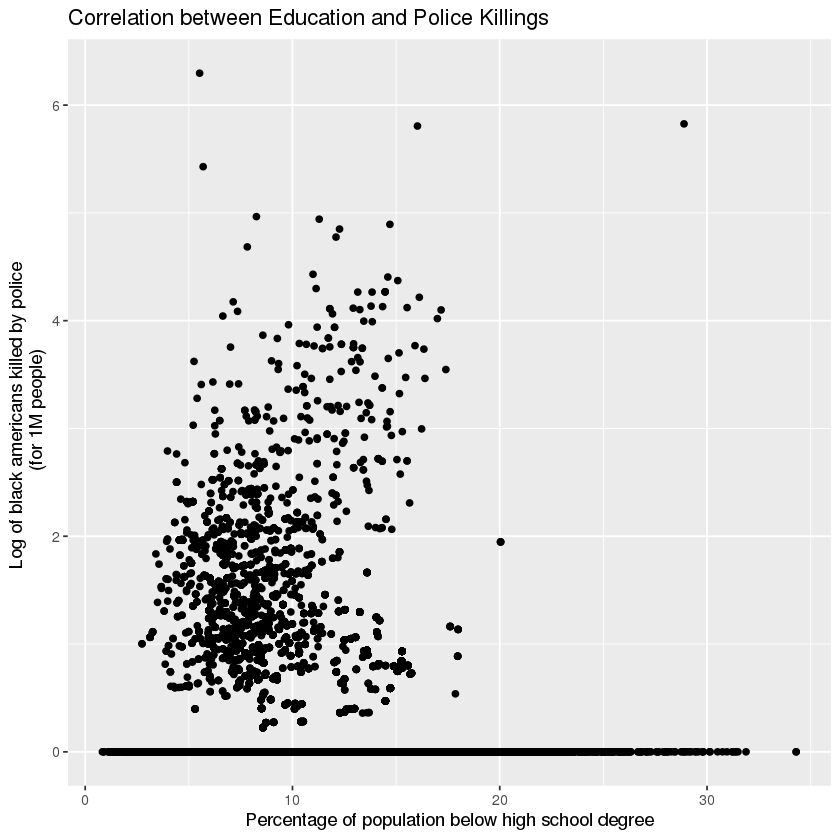

In [313]:
ggplot(Train, aes(x=below_high_school_perc, y=killings_black)) + geom_point() + 
labs(x="Percentage of population below high school degree", 
     y = "Log of black americans killed by police \n (for 1M people)",
    title = "Correlation between Education and Police Killings ")

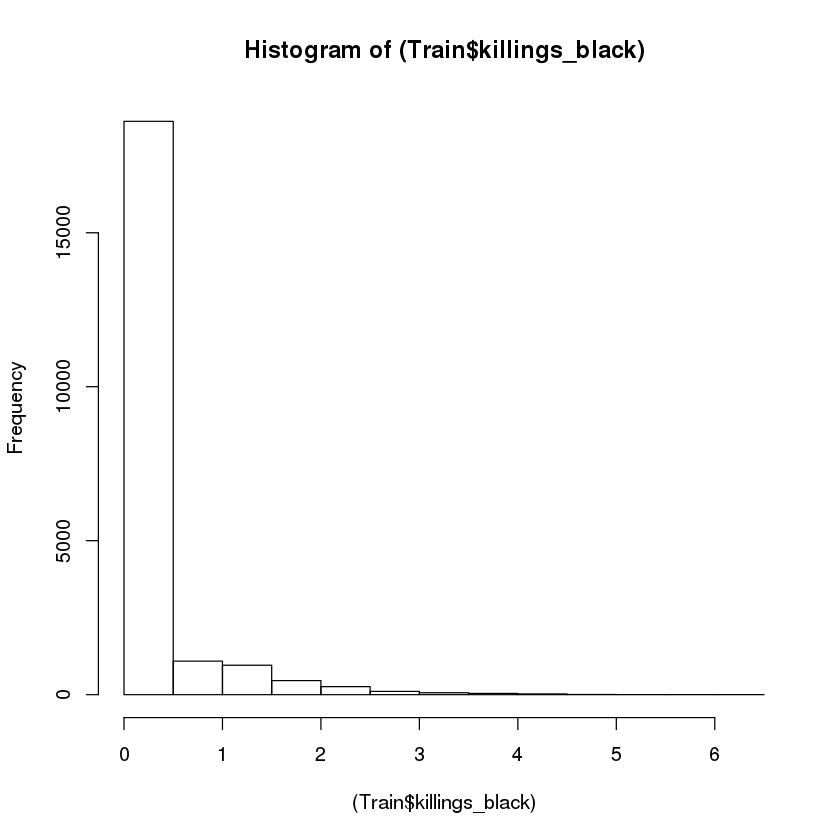

In [282]:
hist((Train$killings_black))

In [283]:
dim(Train)

[1] 21622     8

In [284]:
names(Train)

[1] "killings_black"         "year"                   "state"                 
[4] "poverty_black"          "male_perc"              "black_perc"            
[7] "below_high_school_perc" "unemployment_rate"

In [285]:
head(Train) %>% as.data.frame()

killings_black,year,state,poverty_black,male_perc,black_perc,below_high_school_perc,unemployment_rate
<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2017,AK,9.1,52.51,0.69,8.30,7.58
0,2014,AK,3.8,52.83,0.55,8.43,8.16
0,2018,AK,8.3,51.89,0.88,8.45,7.64
0,2016,AK,8.3,53.27,0.50,8.42,7.90
0,2015,AK,10.6,53.05,0.49,8.62,7.51
0,2013,AK,0.0,51.74,0.55,10.59,8.13


In [286]:
#Creating objects for regression
y = log(as.numeric(Train$killings_black)+1)          # our y variable
d = Train$below_high_school_perc                    # our treatment variable

Train =  Train %>% dplyr::select(-killings_black, -below_high_school_perc)    # remove y and d from Train 
X = model.matrix(d ~ ., Train) # select all variables and remove Intercept 

In [287]:
colnames(X)

[1] "(Intercept)"       "year"              "stateAK"          
 [4] "stateAL"           "stateAR"           "stateAZ"          
 [7] "stateCA"           "stateCO"           "stateCT"          
[10] "stateDE"           "stateFL"           "stateGA"          
[13] "stateHI"           "stateIA"           "stateID"          
[16] "stateIL"           "stateIN"           "stateKS"          
[19] "stateKY"           "stateLA"           "stateMA"          
[22] "stateMD"           "stateME"           "stateMI"          
[25] "stateMN"           "stateMO"           "stateMS"          
[28] "stateMT"           "stateNC"           "stateND"          
[31] "stateNE"           "stateNH"           "stateNJ"          
[34] "stateNM"           "stateNV"           "stateNY"          
[37] "stateOH"           "stateOK"           "stateOR"          
[40] "statePA"           "statePR"           "stateRI"          
[43] "stateSC"           "stateSD"           "stateTN"          
[46] "stateTX"           "stateUT"           "stateVA"          
[49] "stateVT"           "stateWA"           "stateWI"          
[52] "stateWV"           "stateWY"           "poverty_black"    
[55] "male_perc"         "black_perc"        "unemployment_rate"

# Causal Lasso

## 1st Stage

In [288]:
install.packages('doParallel')

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [289]:
# Setting lambda interval
lamb_range = 10 ^ seq(1, -7, length= 100) 

Train2 = as.matrix(Train)
### Runs CV - Lasso

library(doParallel)
registerDoParallel(5)
set.seed(9547)
cv_lasso= cv.glmnet(y = d, 
                    x = X, 
                    alpha = 1, 
                    nfolds = 5,
                    lambda = lamb_range,
                    standardize=TRUE,
                    parallel=TRUE)

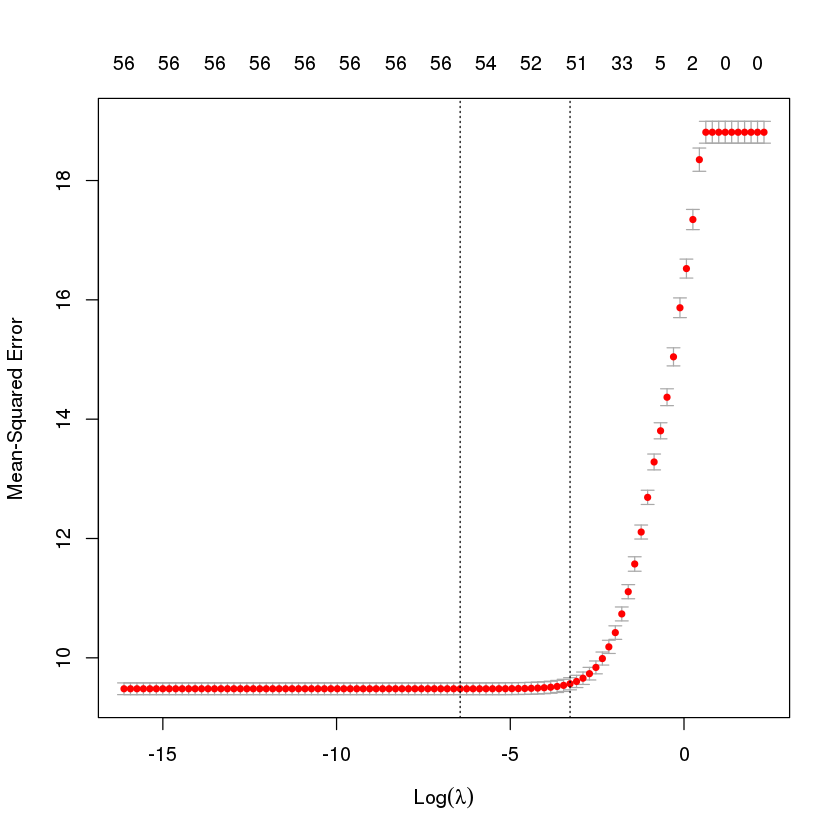

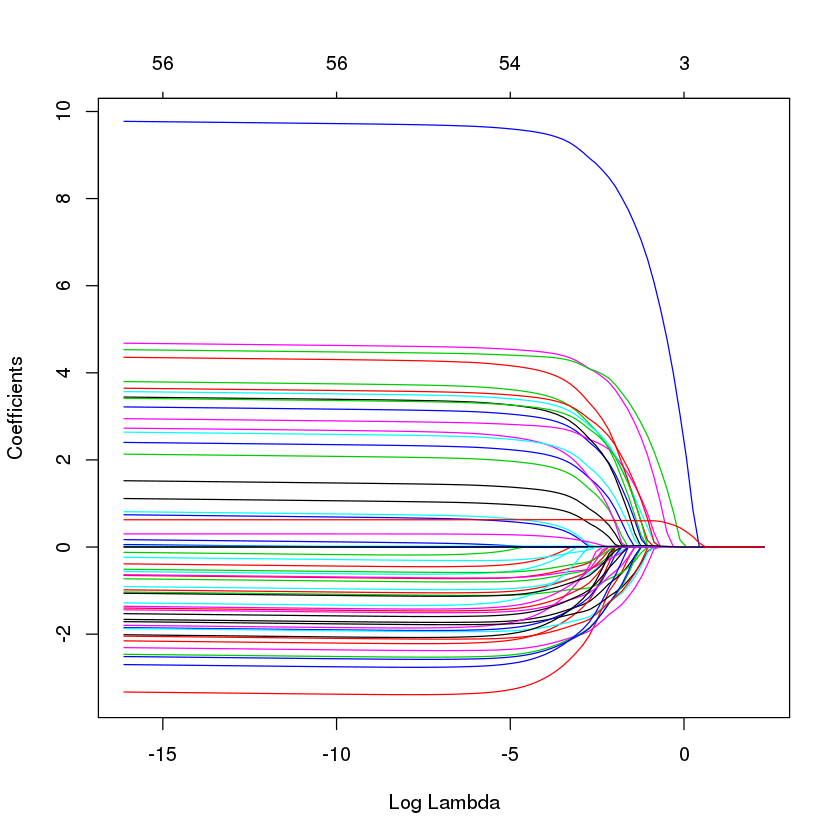

In [290]:
# Plots the MSE errors
plot(cv_lasso)

# Plots the Paths
plot(cv_lasso$glmnet.fit, xvar="lambda")

[1] 9.56549


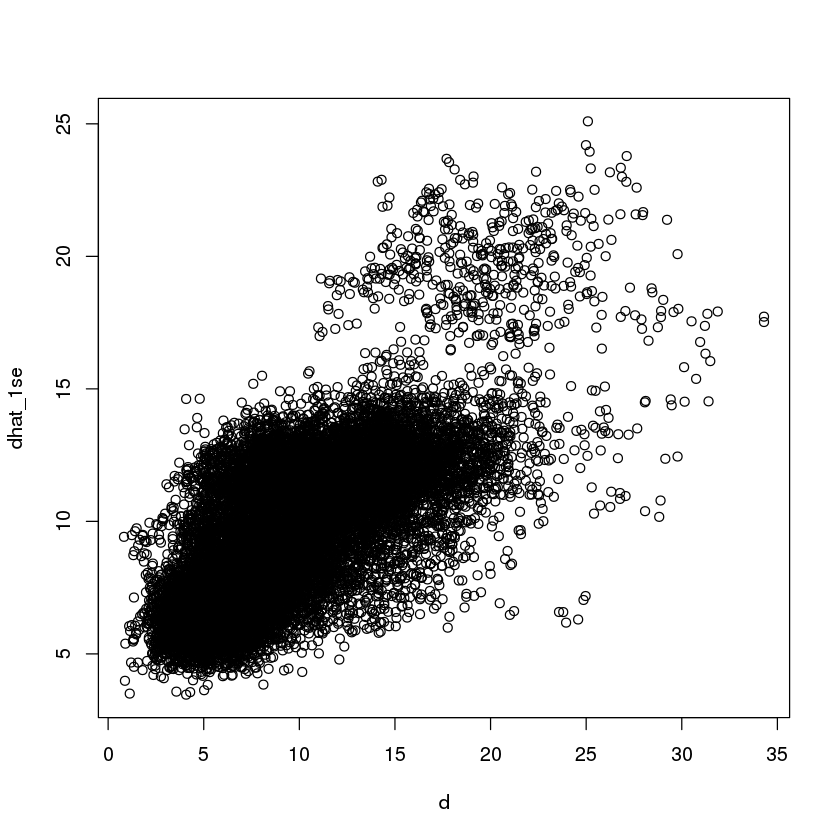

In [291]:
# Estimating D Hat

### Retrieves the lambdas
sd1_lambda = cv_lasso$lambda.1se

# Mean squared errors from best lambdas
print(cv_lasso$cvm[which(cv_lasso$lambda == cv_lasso$lambda.1se)])

# In-sample dhats
dhat_1se = predict(object = cv_lasso, s = "lambda.1se", newx = X)
colnames(dhat_1se) <- "dhat"

# Plot d against dhat
plot(d, dhat_1se)

## 2nd Stage

In [292]:
X2 = cbind(dhat=dhat_1se, treatment = d, X)

In [293]:
# Leave dhat unpenalized
penalty_list = rep(1,ncol(X2))
penalty_list[1] = 0

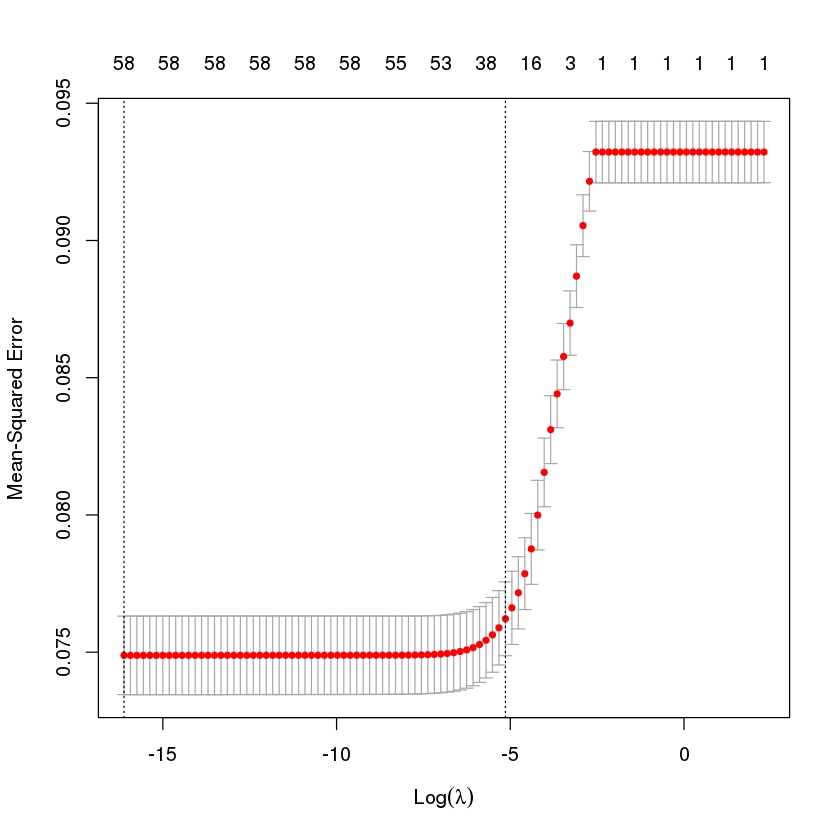

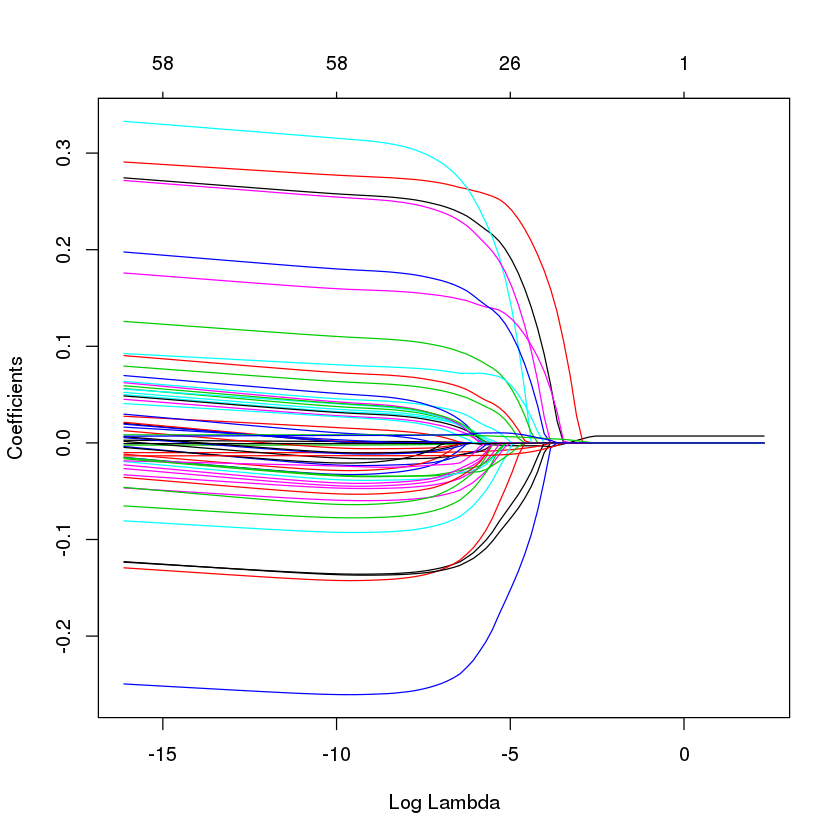

In [294]:
### Run Lasso with dhat unpenalized
set.seed(17)

cv_lasso_final = cv.glmnet(y = y, 
                    x = X2, 
                    alpha = 1, 
                    nfolds = 5,
                    penalty.factor = penalty_list,
                    lambda = lamb_range,
                    standardize=TRUE,
                    parallel=TRUE)

# Plots the MSE errors
plot(cv_lasso_final)

# Plots the Paths
plot(cv_lasso_final$glmnet.fit, xvar="lambda")

In [295]:
cv_lasso_final


Call:  cv.glmnet(x = X2, y = y, lambda = lamb_range, nfolds = 5, parallel = TRUE,      alpha = 1, penalty.factor = penalty_list, standardize = TRUE) 

Measure: Mean-Squared Error 

      Lambda Measure       SE Nonzero
min 0.000000 0.07488 0.001431      58
1se 0.005857 0.07622 0.001346      26

In [296]:
# Number of variables selected by Lasso
print("Total variables left:")
print(sum(coef(cv_lasso_final, select="1se") != 0))    # 43 variables survived

# Optimal lambda: 
lambda_final = cv_lasso_final$lambda.1se # 0.0053
print("final lambda:")
print(lambda_final)

#### !!! Coefficient of Degree variable after controlling for unpenalized dhat. 
impact = coef(cv_lasso_final, select = "lambda.min")["treatment",]
print('impact:')
impact

[1] "Total variables left:"
[1] 27
[1] "final lambda:"
[1] 0.005857021
[1] "impact:"


[1] -0.007471343

In [297]:
# Mean The mean cross-validated error from best lambda
cv_lasso_final$cvm[which(cv_lasso_final$lambda == cv_lasso_final$lambda.1se)]

### AIC
fit2 <- glmnet(y = y,
               x = X2,
               alpha = 1,
               penalty.factor = penalty_list,
               lambda = cv_lasso_final$lambda.1se,
               standardize=TRUE)

tLL2 <- fit2$nulldev - deviance(fit2)
k2 <- fit2$df
n2 <- fit2$nobs
AICc2 <- -tLL2+2*k2+2*k2*(k2+1)/(n2-k2-1)
AICc2

fit2$dev.ratio  # considered R squared

[1] 0.07621869

[1] -329.6434

[1] 0.1885423

## Bootstrap

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
        2.5%        97.5% 
-0.008681199 -0.006273259 


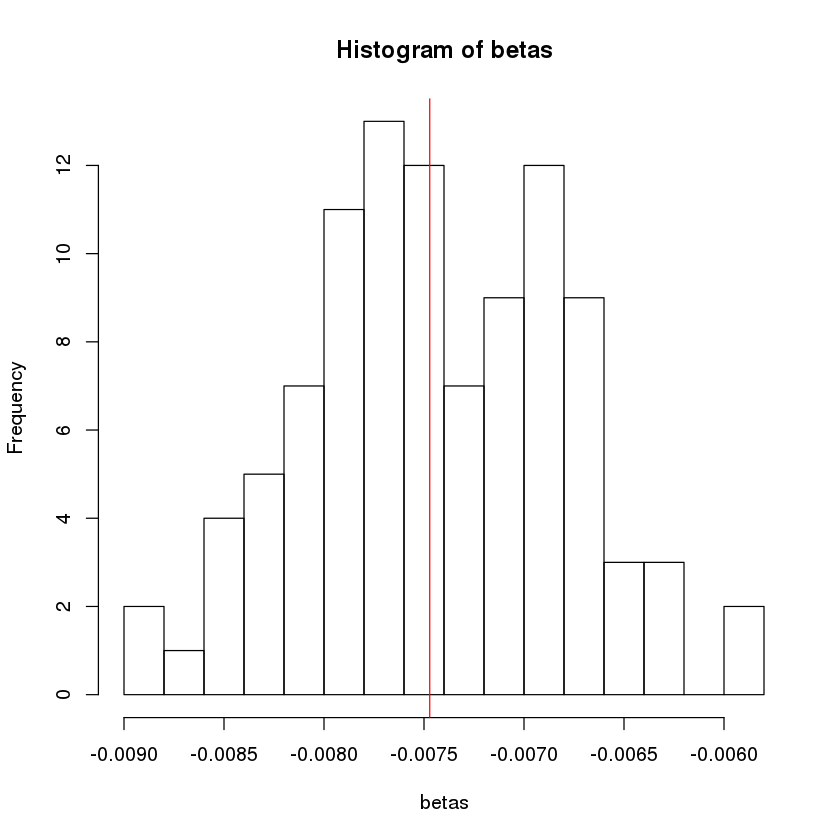

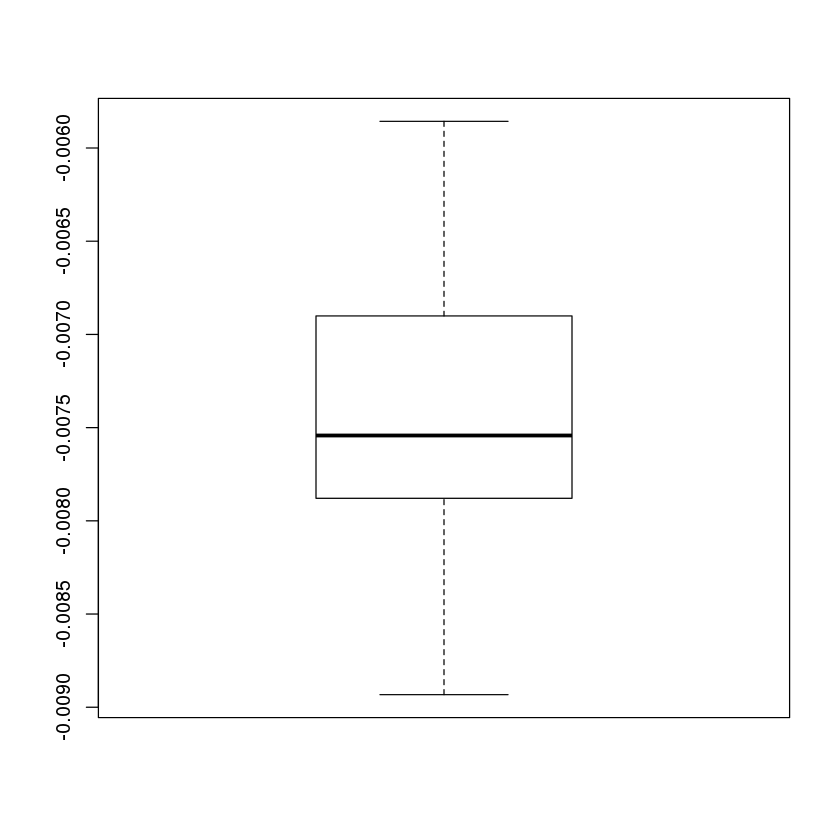

In [298]:
n <- nrow(X2)
betas <- c()

for(ind in 1:100){
  print(ind)
  sam_boot <- sample(1:n, n, replace=T)
  lfit = glmnet(y = y[sam_boot], 
                x = X2[sam_boot,], 
                alpha = 1, 
                penalty.factor = penalty_list,
                lambda = lambda_final,  # min lambda from 3rd question
                standardize=TRUE)
  degree_coef = coef(lfit)["treatment",]
  betas[ind] <- as.numeric(degree_coef)
  
}

betas <- sort(betas)

print(quantile(betas, c(.025, 0.975)))  # confidence interval

# Print histogram of betas (booststrap)
hist(betas, nclass = 20)
abline(v=impact, col=2)

boxplot(betas)